In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
pd.set_option('display.max_columns',None)

df = pd.read_csv(r"C:\Users\17204\Desktop\Thinkful\CirriculumFiles\earthquake_database.csv")
df.head()


,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [4]:
df= df.drop(columns=['depth_error', 'depth_seismic_stations', 'magnitude_error','magnitude_seismic_stations','azimuthal_gap','horizontal_distance','horizontal_error','root_mean_square'])

In [5]:
df.date = df.date.str.replace('/', '-')

In [6]:
import datetime
# converting date to datetime series
df.date = pd.to_datetime(df['date'], format='%m-%d-%Y', errors = 'coerce')


In [7]:
df = df[['date', 'latitude', 'longitude', 'depth', 'magnitude', 'magnitude_type', 'type']]
df.head()

,date,latitude,longitude,depth,magnitude,magnitude_type,type
0,1965-01-02,19.246,145.616,131.6,6.0,MW,Earthquake
1,1965-01-04,1.863,127.352,80.0,5.8,MW,Earthquake
2,1965-01-05,-20.579,-173.972,20.0,6.2,MW,Earthquake
3,1965-01-08,-59.076,-23.557,15.0,5.8,MW,Earthquake
4,1965-01-09,11.938,126.427,15.0,5.8,MW,Earthquake


In [8]:
df = pd.concat([df,pd.get_dummies(df.magnitude_type, prefix="magnitude_type", drop_first=True)], axis=1)
df = pd.concat([df,pd.get_dummies(df.type, prefix="type", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(df.magnitude_type, prefix="magnitude_type", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(df.type, prefix="type", drop_first=True).columns)


In [9]:
pd.value_counts(df.type)

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: type, dtype: int64

In [10]:
pd.value_counts(df.magnitude_type)

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: magnitude_type, dtype: int64

In [11]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap


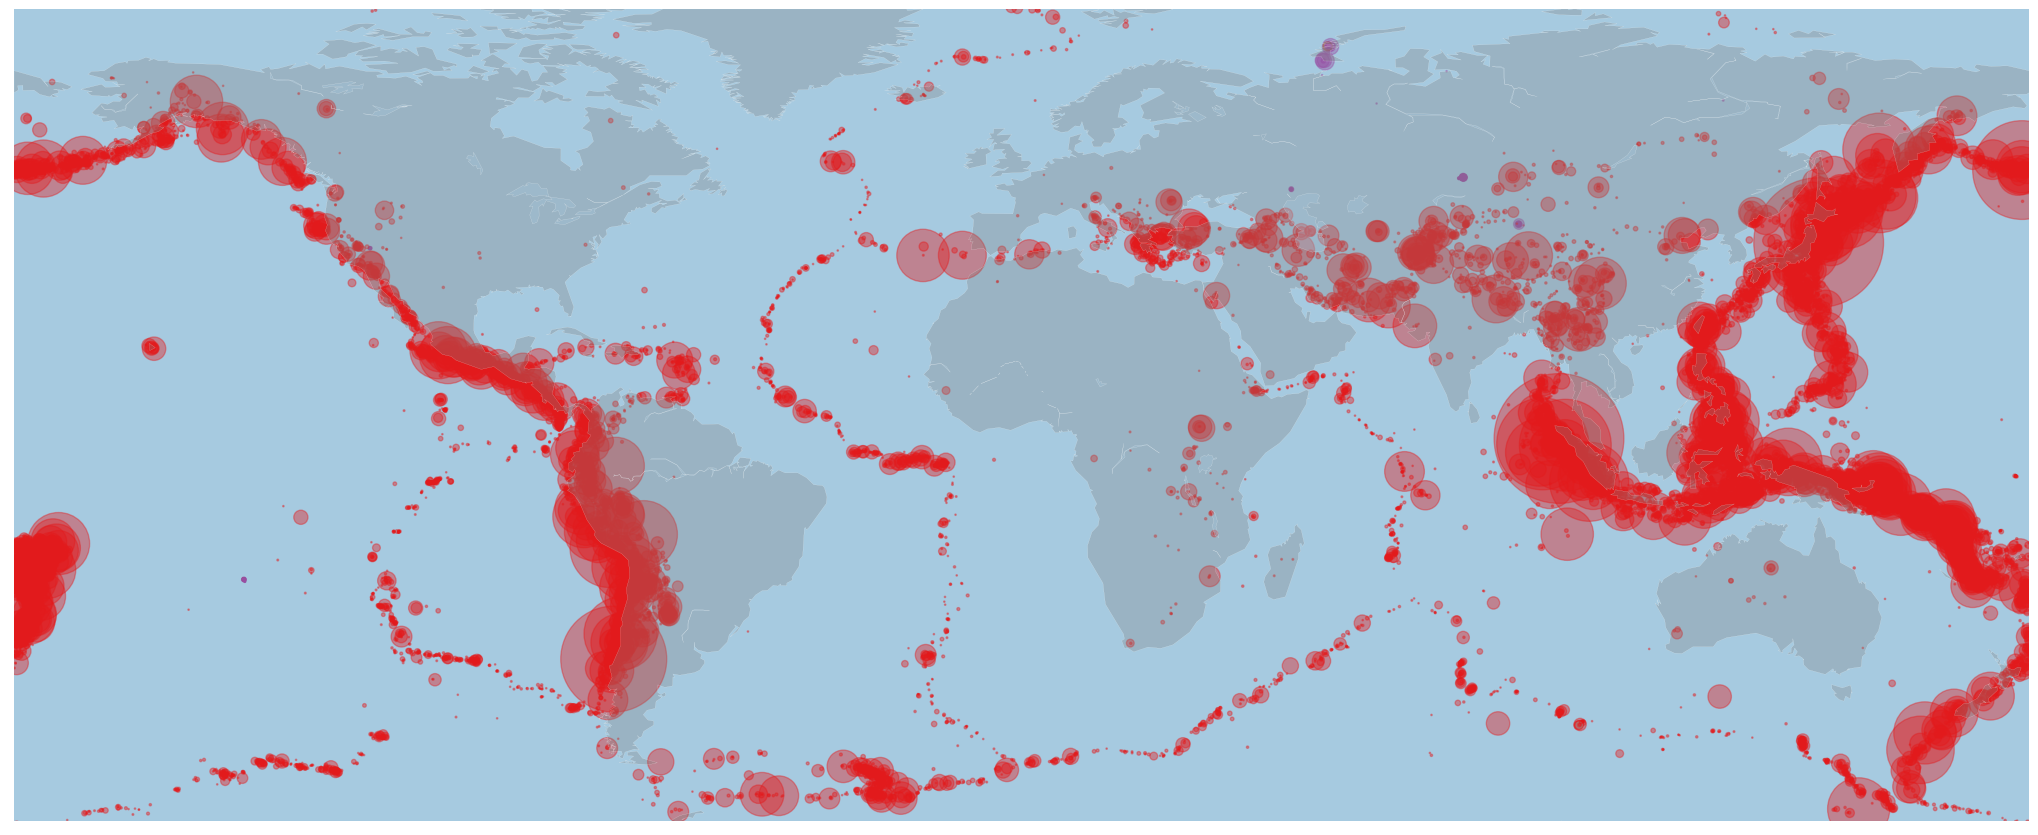

In [12]:
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)


# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# prepare a color for each point depending on the continent.
df['type'] = pd.factorize(df['type'])[0]

# Add a point per position
m.scatter(df['longitude'], df['latitude'], s=((df['magnitude']-df['magnitude'].min()+1)**6), alpha=0.4, c=df['type'], cmap="Set1")

plt.show()


In [13]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

longitudes = df["longitude"].tolist()
latitudes = df["latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

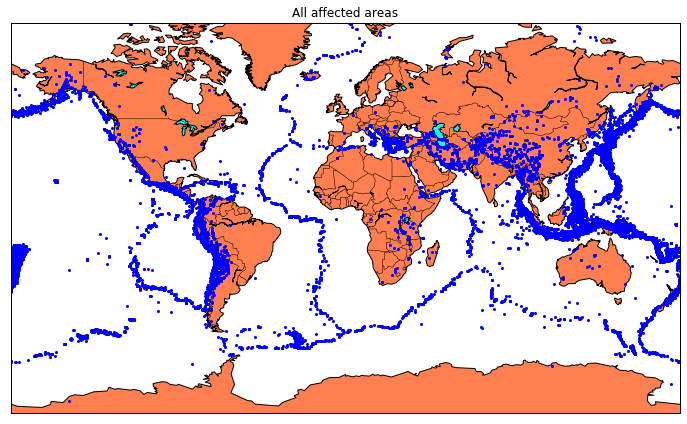

In [14]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color ='b')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

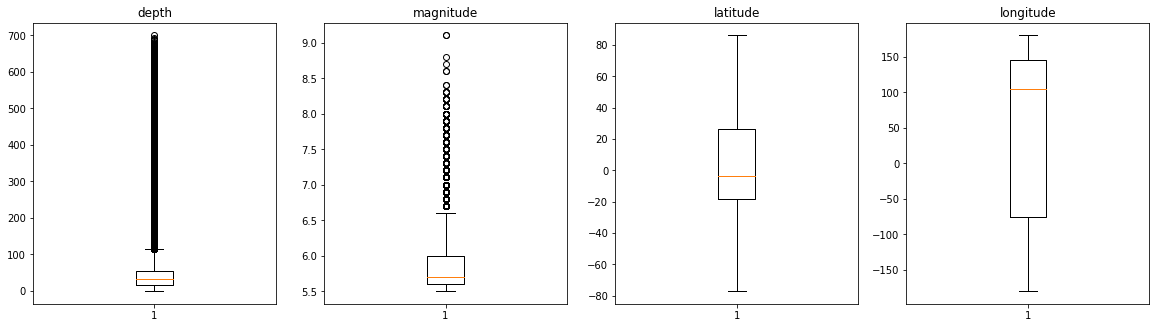

In [15]:
plt.figure(figsize=(20,30))
dict = {'depth':1,'magnitude':2, 'latitude':3, 'longitude':4}

for variable,i in dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

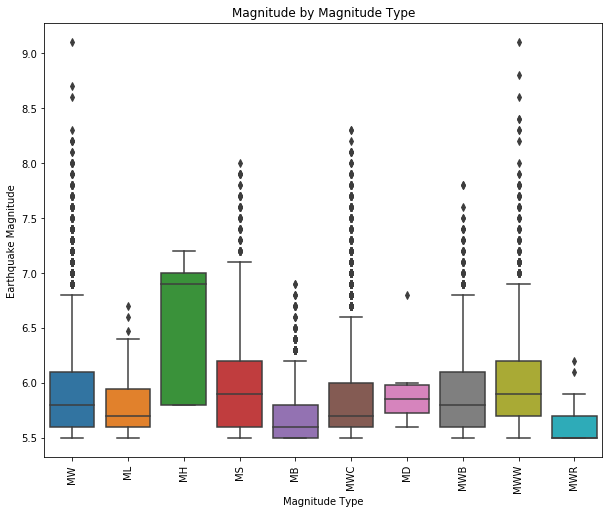

In [16]:
plt.figure(figsize = (10,8))
ax=sns.boxplot(y="magnitude",x ="magnitude_type", data=df)

plt.xlabel('Magnitude Type')
plt.ylabel('Earthquake Magnitude')
plt.title('Magnitude by Magnitude Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

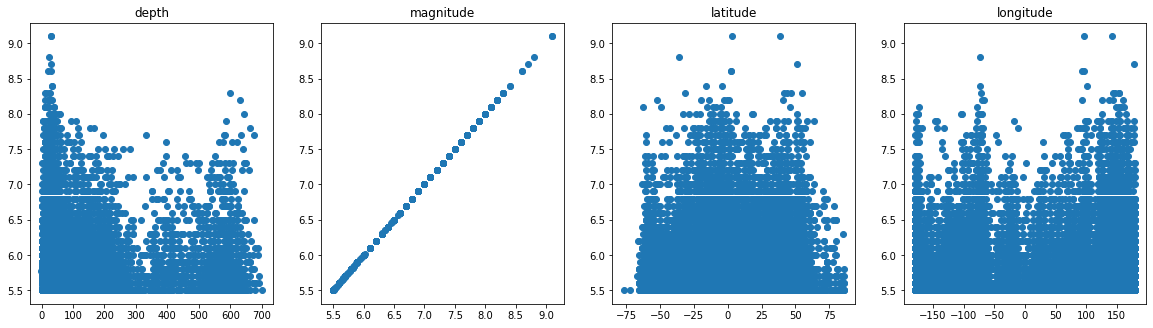

In [17]:
plt.figure(figsize=(20,30))

for variable,i in dict.items():
                     plt.subplot(5,4,i)
                     plt.scatter(df[variable],df["magnitude"])
                     plt.title(variable)

plt.show()

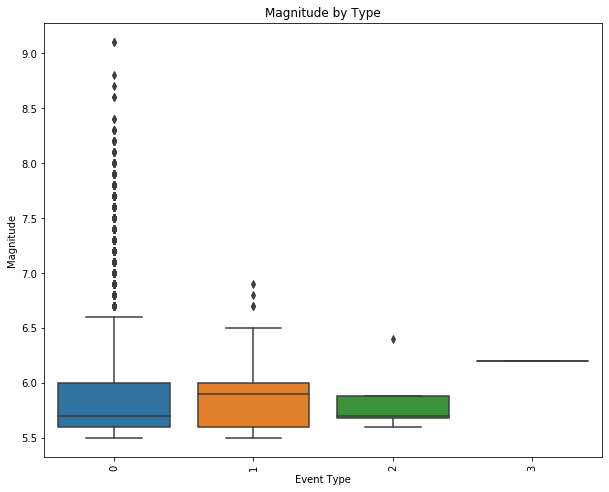

In [18]:
plt.figure(figsize = (10,8))
ax=sns.boxplot(y="magnitude",x ="type", data=df)


plt.xlabel('Event Type')
plt.ylabel('Magnitude')
plt.title('Magnitude by Type')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [19]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine
Y =df["magnitude"]
X =df[['depth', 'latitude', 'longitude']+ dummy_column_names ]




lrm = linear_model.LinearRegression()
lrm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

# We are making predictions here
results = sm.OLS(y_train, X_train).fit()
y_preds = results.predict(X_test)



print(results.summary())

The number of observations in training set is 18729
The number of observations in test set is 4683
R-squared of the model in the training set is: 0.06217216611046594
-----Test set statistics-----
R-squared of the model in the test set is: 0.057448446039489176
Mean absolute error of the prediction is: 0.2976146730352426
Mean squared error of the prediction is: 0.1625753632381236
Root mean squared error of the prediction is: 0.4032063531718264
Mean absolute percentage error of the prediction is: 4.919637790018451
                                 OLS Regression Results                                
Dep. Variable:              magnitude   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              8291.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                        0.00
Time:                        10:19:33   Log

In [21]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              magnitude   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     102.4
Date:                Thu, 16 Jul 2020   Prob (F-statistic):          2.11e-308
Time:                        10:19:33   Log-Likelihood:                -12336.
No. Observations:               23412   AIC:                         2.470e+04
Df Residuals:                   23396   BIC:                         2.483e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.6522      0.007    781.932      0.000       5.638       5.666
depth                      0.0001   2.21e-05      6.741      0.000       0.000       0.000
latitude                   0.0004   9.21e-05      4.420      0.000       0.000       0.001
longitude                  0.0002    2.2e-05      7.477      0.000       0.000       0.000
magnitude_type_MD          0.3131      0.168      1.868      0.062      -0.015       0.642
magnitude_type_MH          0.8914      0.184      4.856      0.000       0.532       1.251
magnitude_type_ML          0.1379      0.048      2.895      0.004       0.045       0.231
magnitude_type_MS          0.3315      0.012     27.325      0.000       0.308       0.355
magnitude_type_MW          0.2624      0.008     31.667      0.000       0.246       0.279
magnitude_type_MWB         0.2376      0.011     22.132      0.000       0.217       0.259
magnitude_type_MWC         0.1908      0.009     21.771      0.000       0.174       0.208
magnitude_type_MWR        -0.0239      0.081     -0.296      0.768      -0.182       0.134
magnitude_type_MWW         0.3395      0.011     29.584      0.000       0.317       0.362
type_Explosion             0.1957      0.205      0.954      0.340      -0.206       0.598
type_Nuclear Explosion     0.1681      0.032      5.246      0.000       0.105       0.231
type_Rock Burst            0.3600      0.410      0.878      0.380      -0.444       1.164
==============================================================================
Omnibus:                     8320.858   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31102.279
Skew:                           1.774   Prob(JB):                         0.00
Kurtosis:                       7.393   Cond. No.                     2.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
from sklearn import neighbors
Y =df["magnitude"]
X =df[['depth', 'latitude', 'longitude'] + dummy_column_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_w.fit(X, Y)


# # We are making predictions here
# y_preds_train = knn_w.predict(X_train)
# y_preds_test = knn_w.predict(X_test)

# print("R-squared of the model in the training set is: {}".format(knn_w.score(X_train, y_train)))
# print("-----Test set statistics-----")
# print("R-squared of the model in the test set is: {}".format(knn_w.score(X_test, y_test)))
# print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
# print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
# print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
# print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [23]:
from sklearn.model_selection import cross_val_score

score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: -0.14 (+/- 0.06)
